# HR Analytics

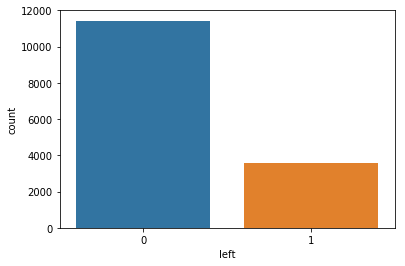

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


le=LabelEncoder()
data=pd.read_csv('HR_comma_sep.csv')
y=data['left']
data.drop(labels={'left'},axis=1,inplace=True)
data.salary=le.fit_transform(data.salary)
data.Department=le.fit_transform(data.Department)

sns.countplot(y,data=data)
plt.show()






# Selecting Best Algorithm

In [14]:
from sklearn import metrics
from sklearn import svm
X_train,X_test,y_train,y_test=train_test_split(data,y,test_size=0.25,random_state=0)

lr=LogisticRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
print('Accuracy for LR is  ',metrics.accuracy_score(pred,y_test))

dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
pred=dtc.predict(X_test)
print('Accuracy for Decision tree is  ',metrics.accuracy_score(pred,y_test))

from sklearn.neighbors import KNeighborsClassifier
knr=KNeighborsClassifier(n_neighbors=3)
knr.fit(X_train,y_train)
pred=knr.predict(X_test)
print('Accuracy for Decision tree is  ',metrics.accuracy_score(pred,y_test))



Accuracy for LR is   0.764
Accuracy for Decision tree is   0.9805333333333334
Accuracy for Decision tree is   0.9424


F:\Jupiter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Using KFold

In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
xyz=[]
accuracy=[]
results = []
names = []
classifiers=['Logistic Regression','Decision Tree','KNN']
abc=[]
models=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=3)]

for i in models:
    kfold = KFold(n_splits=10, random_state=21)
    model=i
    cv_result = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_result=cv_result

 
    xyz.append(cv_result.mean())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame(xyz,index=classifiers)   
new_models_dataframe2.columns=['CV Mean']    
new_models_dataframe2


,CV Mean
Logistic Regression,0.765937
Decision Tree,0.976265
KNN,0.934661
